## Plants Seedling Classification - Solution

### Background and Context

In recent times, the field of agriculture has been in urgent need of modernizing, since the amount of manual work people need to put in to check if plants are growing correctly is still highly extensive. Despite several advances in agricultural technology, people working in the agricultural industry still need to have the ability to sort and recognize different plants and weeds, which takes a lot of time and effort in the long term.

The potential is ripe for this trillion-dollar industry to be greatly impacted by technological innovations that cut down on the requirement for manual labor, and this is where Artificial Intelligence can benefit the workers in this field, as the time and energy required to identify plant seedlings will be greatly shortened by the use of AI and Deep Learning. The ability to do so far more efficiently and even more effectively than experienced manual labor could lead to better crop yields, the freeing up of human involvement for higher-order agricultural decision making, and in the long term will result in more sustainable environmental practices in agriculture as well.

### Objective

The Aarhus University Signal Processing group, in collaboration with the University of Southern Denmark, has provided the data containing images of unique plants belonging to 12 different species. You being a data scientist, need to build a Convolutional Neural Network model which would classify the plant seedlings into their respective 12 categories.

### Data Description

This dataset contains images of unique plants belonging to 12 different species.
The data file names are:
images.npy
Label.csv
Due to the large volume of data, the images were converted to numpy arrays and stored in images.npy file and the corresponding labels are also put into Labels.csv so that you can work on the data/project seamlessly without having to worry about the high data volume.
The goal of the project is to create a classifier capable of determining a plant's species from an image.

#### List of Plant species

- Black-grass
- Charlock
- Cleavers
- Common Chickweed
- Common Wheat
- Fat Hen
- Loose Silky-bent
- Maize
- Scentless Mayweed
- Shepherds Purse
- Small-flowered Cranesbill
- Sugar beet

#### Loading required libraries

In [200]:
import os
import numpy as np                                                                               # Importing numpy for Matrix Operations
import pandas as pd                                                                              # Importing pandas to read CSV files
import matplotlib.pyplot as plt                                                                  # Importting matplotlib for Plotting and visualizing images
import math                                                                                      # Importing math module to perform mathematical operations
import cv2                                                                                       # Importing openCV for image processing
import seaborn as sns                                                                            # Importing seaborn to plot graphs


# Tensorflow modules
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator                              # Importing the ImageDataGenerator for data augmentation
from tensorflow.keras.models import Sequential                                                   # Importing the sequential module to define a sequential model
from tensorflow.keras.layers import Dense,Dropout,Flatten,Conv2D,MaxPooling2D,BatchNormalization # Defining all the layers to build our CNN Model
from tensorflow.keras.optimizers import Adam,SGD                                                 # Importing the optimizers which can be used in our model
from sklearn import preprocessing                                                                # Importing the preprocessing module to preprocess the data
from sklearn.model_selection import train_test_split                                             # Importing train_test_split function to split the data into train and test
from sklearn.metrics import confusion_matrix                                                     # Importing confusion_matrix to plot the confusion matrix
from tensorflow.keras.callbacks import EarlyStopping  #regularization method to prevent the overfitting
from tensorflow.keras.callbacks import ModelCheckpoint

# Display images using OpenCV

#### Reading the dataset

In [201]:
# Load the image file of the dataset
images = np.load('./images.npy')

# Load the labels file of the dataset
labels = pd.read_csv('./Labels.csv')

#### Overview of the dataset

In [202]:
print(images.shape)
print(labels.shape)

(4750, 128, 128, 3)
(4750, 1)


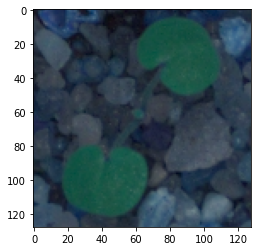

In [203]:
plt.imshow(images[5])

### Exploratory Data Analysis - EDA

#### Plotting images

In [204]:
def plot_images(images,labels):
  num_classes=12                                                                  # Number of Classes
  categories=np.unique(labels)   
  keys=dict(labels['Label'])                                                      # Obtaing the unique classes from y_train
  rows = 3                                                                        # Defining number of rows=3
  cols = 4                                                                        # Defining number of columns=4
  fig = plt.figure(figsize=(10, 8))                                               # Defining the figure size to 10x8
  for i in range(cols):
      for j in range(rows):
          random_index = np.random.randint(0, len(labels))                        # Generating random indices from the data and plotting the images
          ax = fig.add_subplot(rows, cols, i * rows + j + 1)                      # Adding subplots with 3 rows and 4 columns
          ax.imshow(images[random_index, :])                                      # Plotting the image 
          ax.set_title(keys[random_index])
  plt.show()

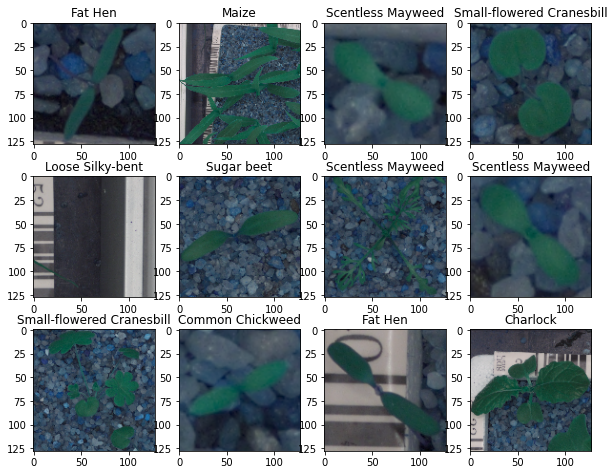

In [205]:
plot_images(images,labels)

#### Visualizing images using Gaussian Blur

In [206]:
# Applying Gaussian Blur to denoise the images
images_gb=[]
for i in range(len(images)):
  # gb[i] = cv2.cvtColor(images[i], cv2.COLOR_BGR2RGB)
  images_gb.append(cv2.GaussianBlur(images[i], ksize =(3,3),sigmaX =  0))

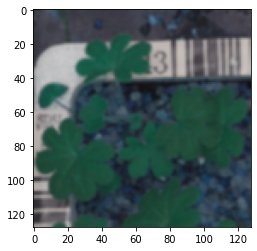

In [207]:
plt.imshow(images_gb[3])

- It appears that GaussianBlur would be ineffective because the blurred or denoised image does not seem to contain any relevant information, and the model would struggle to categorize these blurred images.

### Resizing Images

In [208]:
images_decreased=[]
height = 64
width = 64
dimensions = (width, height)  
for i in range(len(images)):
  images_decreased.append( cv2.resize(images[i], dimensions, interpolation=cv2.INTER_LINEAR))

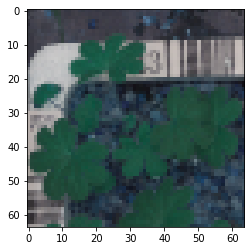

In [209]:
plt.imshow(images_decreased[3])

### Splitting the dataset

In [210]:
from sklearn.model_selection import train_test_split
X_temp, X_test, y_temp, y_test = train_test_split(np.array(images_decreased),labels , test_size=0.2, random_state=42,stratify=labels)
X_train, X_val, y_train, y_val = train_test_split(X_temp,y_temp , test_size=0.2, random_state=42,stratify=y_temp)

In [211]:
print(X_train.shape,y_train.shape)
print(X_val.shape,y_val.shape)
print(X_test.shape,y_test.shape)

(3040, 64, 64, 3) (3040, 1)
(760, 64, 64, 3) (760, 1)
(950, 64, 64, 3) (950, 1)


#### Checking for data imbalance

C:\Users\atifh\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 [Text(0, 0, 'Small-flowered Cranesbill'),
  Text(1, 0, 'Fat Hen'),
  Text(2, 0, 'Shepherds Purse'),
  Text(3, 0, 'Common wheat'),
  Text(4, 0, 'Common Chickweed'),
  Text(5, 0, 'Charlock'),
  Text(6, 0, 'Cleavers'),
  Text(7, 0, 'Scentless Mayweed'),
  Text(8, 0, 'Sugar beet'),
  Text(9, 0, 'Maize'),
  Text(10, 0, 'Black-grass'),
  Text(11, 0, 'Loose Silky-bent')])

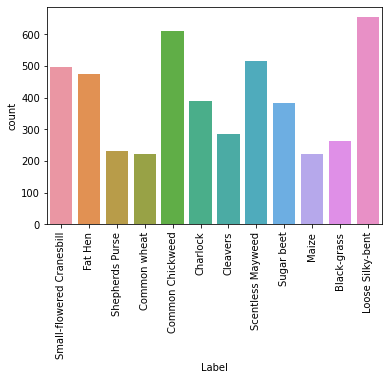

In [212]:
sns.countplot(labels['Label'])
plt.xticks(rotation='vertical')

- As you can see from the above plot, the dataset is quite imbalanced.
- So will calculate class_weights below to treat the class imbalance by increasing the weights of the minority classes.

In [213]:
from sklearn.utils import class_weight

labelList = np.unique(labels)
class_weights = class_weight.compute_class_weight(class_weight = "balanced",
                                                  classes = np.array(labelList),
                                                  y = y_train.values.reshape(-1)
                                                  )
class_weights = dict(zip(np.array(range(len(labelList))), class_weights))
#print calculated class weights
class_weights

{0: 1.507936507936508,
 1: 1.0133333333333334,
 2: 1.384335154826958,
 3: 0.6479113384484229,
 4: 1.784037558685446,
 5: 0.8333333333333334,
 6: 0.6060606060606061,
 7: 1.784037558685446,
 8: 0.7676767676767676,
 9: 1.7117117117117118,
 10: 0.7966457023060797,
 11: 1.029810298102981}

### Making data compatible:

- Convert labels from names to one hot vectors
- Normalizing the values

#### Encoding the target variables

In [214]:
# Convert labels from names to one hot vectors.
# We have already used encoding methods like onehotencoder and labelencoder earlier so now we will be using a new encoding method called labelBinarizer.
# Labelbinarizer works similar to onehotencoder 

from sklearn.preprocessing import LabelBinarizer
enc = LabelBinarizer()
y_train_encoded = enc.fit_transform(y_train)
y_val_encoded=enc.transform(y_val)
y_test_encoded=enc.transform(y_test)

#### Data Normalization

In [215]:
# Normalizing the image pixels
X_train_normalized = X_train.astype('float32')/255.0
X_val_normalized = X_val.astype('float32')/255.0
X_test_normalized = X_test.astype('float32')/255.0

## Model Building

### Model1 - Base CNN

In [216]:
# Clearing backend
from tensorflow.keras import backend
backend.clear_session()

# Fixing the seed for random number generators
import random
np.random.seed(42)
random.seed(42)
tf.random.set_seed(42)

In [217]:
# Intializing a sequential model
model = Sequential()

# Adding first conv layer with 64 filters and kernel size 3x3 , padding 'same' provides the output size same as the input size
# Input_shape denotes input image dimension of images
model.add(Conv2D(64, (3, 3), activation='relu', padding="same", input_shape=(64, 64, 3)))

# Adding max pooling to reduce the size of output of first conv layer
model.add(MaxPooling2D((2, 2), padding = 'same'))

model.add(Conv2D(32, (3, 3), activation='relu', padding="same"))
model.add(MaxPooling2D((2, 2), padding = 'same'))

# flattening the output of the conv layer after max pooling to make it ready for creating dense connections
model.add(Flatten())

# Adding a fully connected dense layer with 100 neurons    
model.add(Dense(16, activation='relu'))
model.add(Dropout(0.2))
# Adding the output layer with 10 neurons and activation functions as softmax since this is a multi-class classification problem  
model.add(Dense(12, activation='softmax'))

# Using SGD Optimizer
# opt = SGD(learning_rate=0.01, momentum=0.9)
opt=Adam()
# Compile model
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

# Generating the summary of the model
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 64, 64, 64)        1792      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 32, 32, 64)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 32)        18464     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 16, 16, 32)       0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 8192)              0         
                                                                 
 dense (Dense)               (None, 16)                1

In [218]:
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=5)
mc = ModelCheckpoint('best_model.h5', monitor='val_accuracy', mode='max', verbose=1, save_best_only=True)

history_1 = model.fit(
            X_train_normalized, y_train_encoded,
            epochs=25,
            class_weight=class_weights,
            validation_data=(X_val_normalized,y_val_encoded),
            callbacks=[es, mc],
            batch_size=32,
            verbose=2
)

Epoch 1/25

Epoch 1: val_accuracy improved from -inf to 0.07105, saving model to best_model.h5
95/95 - 23s - loss: 2.4693 - accuracy: 0.0753 - val_loss: 2.4158 - val_accuracy: 0.0711 - 23s/epoch - 247ms/step
Epoch 2/25

Epoch 2: val_accuracy improved from 0.07105 to 0.16053, saving model to best_model.h5
95/95 - 23s - loss: 2.3395 - accuracy: 0.1382 - val_loss: 2.2291 - val_accuracy: 0.1605 - 23s/epoch - 245ms/step
Epoch 3/25

Epoch 3: val_accuracy improved from 0.16053 to 0.18947, saving model to best_model.h5
95/95 - 24s - loss: 2.2194 - accuracy: 0.1753 - val_loss: 2.1066 - val_accuracy: 0.1895 - 24s/epoch - 248ms/step
Epoch 4/25

Epoch 4: val_accuracy improved from 0.18947 to 0.22763, saving model to best_model.h5
95/95 - 22s - loss: 2.1424 - accuracy: 0.1813 - val_loss: 2.0657 - val_accuracy: 0.2276 - 22s/epoch - 228ms/step
Epoch 5/25

Epoch 5: val_accuracy did not improve from 0.22763
95/95 - 21s - loss: 2.0773 - accuracy: 0.1559 - val_loss: 2.0067 - val_accuracy: 0.1566 - 21s/ep

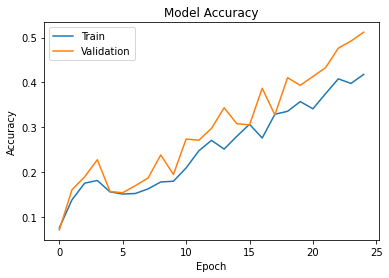

In [219]:
plt.plot(history_1.history['accuracy'])
plt.plot(history_1.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [220]:
accuracy = model.evaluate(X_test_normalized, y_test_encoded, verbose=2)

30/30 - 2s - loss: 1.4586 - accuracy: 0.5189 - 2s/epoch - 60ms/step


In [221]:
# Here we would get the output as probablities for each category
y_pred=model.predict(X_test_normalized)

30/30 [==============================] - 2s 69ms/step


In [222]:
y_pred

array([[6.0944548e-12, 6.4076027e-03, 2.7478421e-07, ..., 1.6810702e-01,
        1.3041202e-03, 5.1024999e-04],
       [3.6632460e-05, 2.4410939e-01, 7.1462342e-03, ..., 1.6870749e-01,
        2.4503063e-01, 3.1571407e-02],
       [1.4954597e-04, 1.7999482e-03, 9.2739094e-05, ..., 3.0761522e-01,
        8.4022302e-03, 5.3538632e-02],
       ...,
       [4.3592458e-03, 1.5375975e-02, 5.1618544e-03, ..., 2.7978936e-01,
        3.8113564e-02, 1.0239451e-01],
       [1.7564072e-03, 1.7191589e-02, 5.1331455e-03, ..., 2.8052121e-01,
        2.5009772e-02, 7.1261719e-02],
       [6.7763388e-08, 2.6943320e-02, 7.1544870e-05, ..., 2.5458527e-01,
        1.1181095e-02, 6.4056953e-03]], dtype=float32)

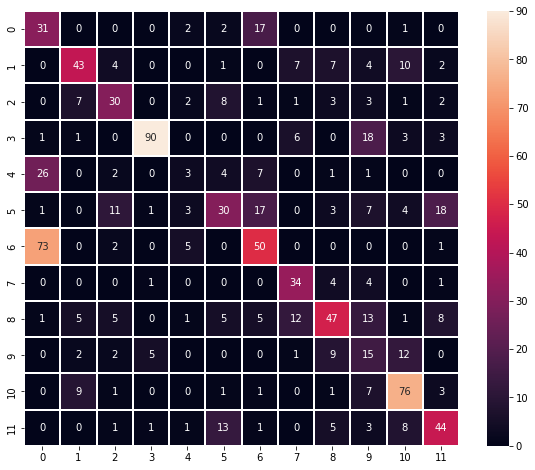

In [223]:
# Obtaining the categorical values from y_test_encoded and y_pred
y_pred_arg=np.argmax(y_pred,axis=1)
y_test_arg=np.argmax(y_test_encoded,axis=1)

# Plotting the Confusion Matrix using confusion matrix() function which is also predefined tensorflow module
confusion_matrix = tf.math.confusion_matrix(y_test_arg,y_pred_arg)
f, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(
    confusion_matrix,
    annot=True,
    linewidths=.4,
    fmt="d",
    square=True,
    ax=ax
)
plt.show()

In [224]:
from sklearn.metrics import classification_report
print(classification_report((y_test_arg), y_pred_arg))

              precision    recall  f1-score   support

           0       0.23      0.58      0.33        53
           1       0.64      0.55      0.59        78
           2       0.52      0.52      0.52        58
           3       0.92      0.74      0.82       122
           4       0.18      0.07      0.10        44
           5       0.47      0.32      0.38        95
           6       0.51      0.38      0.43       131
           7       0.56      0.77      0.65        44
           8       0.59      0.46      0.51       103
           9       0.20      0.33      0.25        46
          10       0.66      0.77      0.71        99
          11       0.54      0.57      0.55        77

    accuracy                           0.52       950
   macro avg       0.50      0.50      0.49       950
weighted avg       0.55      0.52      0.52       950



#### Observations

- We observe that some of the classes are not predicted correctly.
- In comparison to the rest, we can see that classes 6,7 and 9 are well classified.
- We can also observe that classes 0,2,5,6 and 11 are mostly misclassified.
- Will will try add an extra layer + different filter size to our base CNN model and see if that makes any difference.

### Model2 - Extra conv layer + different filter size

In [225]:
# Clearing backend
from tensorflow.keras import backend
backend.clear_session()

In [226]:
# Fixing the seed for random number generators
import random
np.random.seed(42)
random.seed(42)
tf.random.set_seed(42)

In [227]:
# Intializing a sequential model
model = Sequential()

# Adding first conv layer with 64 filters and kernel size 3x3 , padding 'same' provides the output size same as the input size
# Input_shape denotes input image dimension of images
model.add(Conv2D(128, (5, 5), activation='relu', padding="same", input_shape=(64, 64, 3)))

# Adding max pooling to reduce the size of output of first conv layer
model.add(MaxPooling2D((2, 2), padding = 'same'))

model.add(Conv2D(64, (3, 3), activation='relu', padding="same"))

# Adding max pooling to reduce the size of output of first conv layer
model.add(MaxPooling2D((2, 2), padding = 'same'))

model.add(Conv2D(32, (3, 3), activation='relu', padding="same"))
model.add(MaxPooling2D((2, 2), padding = 'same'))

# flattening the output of the conv layer after max pooling to make it ready for creating dense connections
model.add(Flatten())

# Adding a fully connected dense layer with 100 neurons    
model.add(Dense(16, activation='relu'))
model.add(Dropout(0.2))
# Adding the output layer with 10 neurons and activation functions as softmax since this is a multi-class classification problem  
model.add(Dense(12, activation='softmax'))

# Using SGD Optimizer
# opt = SGD(learning_rate=0.01, momentum=0.9)
opt=Adam()
# Compile model
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

# Generating the summary of the model
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 64, 64, 128)       9728      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 32, 32, 128)      0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 64)        73792     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 16, 16, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 16, 16, 32)        18464     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 8, 8, 32)         0

In [228]:
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=5)
mc = ModelCheckpoint('best_model.h5', monitor='val_accuracy', mode='max', verbose=1, save_best_only=True)

history_1 = model.fit(
            X_train_normalized, y_train_encoded,
            epochs=25,
            class_weight=class_weights,
            validation_data=(X_val_normalized,y_val_encoded),
            callbacks=[es, mc],
            batch_size=32,
            verbose=2
)

Epoch 1/25

Epoch 1: val_accuracy improved from -inf to 0.08026, saving model to best_model.h5
95/95 - 66s - loss: 2.4867 - accuracy: 0.0546 - val_loss: 2.4834 - val_accuracy: 0.0803 - 66s/epoch - 694ms/step
Epoch 2/25

Epoch 2: val_accuracy did not improve from 0.08026
95/95 - 64s - loss: 2.4720 - accuracy: 0.1046 - val_loss: 2.4931 - val_accuracy: 0.0566 - 64s/epoch - 673ms/step
Epoch 3/25

Epoch 3: val_accuracy improved from 0.08026 to 0.14342, saving model to best_model.h5
95/95 - 64s - loss: 2.4162 - accuracy: 0.1240 - val_loss: 2.3731 - val_accuracy: 0.1434 - 64s/epoch - 676ms/step
Epoch 4/25

Epoch 4: val_accuracy improved from 0.14342 to 0.24605, saving model to best_model.h5
95/95 - 64s - loss: 2.2086 - accuracy: 0.1576 - val_loss: 2.0455 - val_accuracy: 0.2461 - 64s/epoch - 670ms/step
Epoch 5/25

Epoch 5: val_accuracy improved from 0.24605 to 0.29211, saving model to best_model.h5
95/95 - 64s - loss: 2.0363 - accuracy: 0.2240 - val_loss: 1.8337 - val_accuracy: 0.2921 - 64s/ep

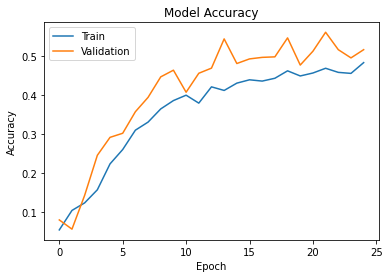

In [229]:
plt.plot(history_1.history['accuracy'])
plt.plot(history_1.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

#### Observations

- We can see from the above plot that the training accuracy of the model was good but the validation accuracy was not good.
- The model seems to overfit on the data.

In [230]:
accuracy = model.evaluate(X_test_normalized, y_test_encoded, verbose=2)

30/30 - 8s - loss: 1.1484 - accuracy: 0.5400 - 8s/epoch - 262ms/step


- We can observe that our accuracy has improved compared to our previous model.

In [231]:
# Here we would get the output as probablities for each category
y_pred=model.predict(X_test_normalized)

30/30 [==============================] - 9s 284ms/step


In [232]:
y_pred

array([[3.0228966e-14, 2.1666657e-02, 3.2631183e-06, ..., 2.0277187e-04,
        5.6741661e-05, 3.7685902e-05],
       [3.8296701e-08, 7.1386732e-02, 2.1721952e-04, ..., 2.8551829e-01,
        5.8750969e-01, 3.9537647e-04],
       [1.0703696e-08, 1.9796386e-04, 1.0423165e-07, ..., 1.1441890e-01,
        5.5722623e-05, 9.5993269e-04],
       ...,
       [5.4785726e-03, 4.0927444e-02, 3.8981553e-02, ..., 4.1400883e-02,
        1.2215473e-03, 1.0602905e-01],
       [7.7381189e-04, 7.9878810e-04, 3.7431320e-05, ..., 3.7093334e-02,
        2.2822706e-04, 1.4509265e-01],
       [8.2763975e-08, 9.0765143e-03, 2.8577206e-05, ..., 5.3303683e-01,
        4.5528812e-03, 5.5073190e-04]], dtype=float32)

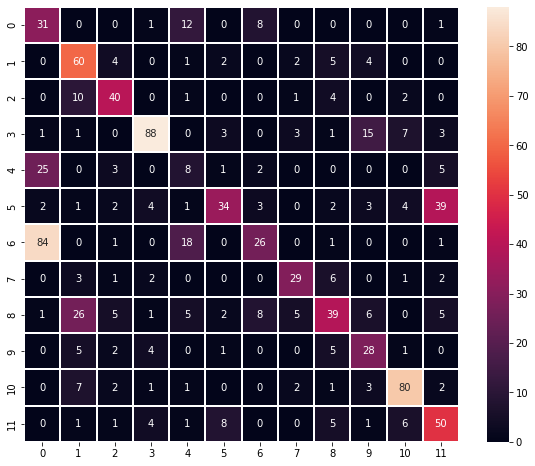

In [233]:
# Obtaining the categorical values from y_test_encoded and y_pred
y_pred_arg=np.argmax(y_pred,axis=1)
y_test_arg=np.argmax(y_test_encoded,axis=1)

# Plotting the Confusion Matrix using confusion matrix() function which is also predefined tensorflow module
confusion_matrix = tf.math.confusion_matrix(y_test_arg,y_pred_arg)
f, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(
    confusion_matrix,
    annot=True,
    linewidths=.4,
    fmt="d",
    square=True,
    ax=ax
)
plt.show()

In [234]:
from sklearn.metrics import classification_report
print(classification_report((y_test_arg), y_pred_arg))

              precision    recall  f1-score   support

           0       0.22      0.58      0.31        53
           1       0.53      0.77      0.62        78
           2       0.66      0.69      0.67        58
           3       0.84      0.72      0.78       122
           4       0.17      0.18      0.17        44
           5       0.67      0.36      0.47        95
           6       0.55      0.20      0.29       131
           7       0.69      0.66      0.67        44
           8       0.57      0.38      0.45       103
           9       0.47      0.61      0.53        46
          10       0.79      0.81      0.80        99
          11       0.46      0.65      0.54        77

    accuracy                           0.54       950
   macro avg       0.55      0.55      0.53       950
weighted avg       0.59      0.54      0.54       950



#### Observations

- The confusion matrix appears to be improving as well, since we added an extra conv layer and also changed the filter size.
- We can observe that this model has performed slightly better than our previous model.

### Model3 - Data Augmentation and Batch Normalization

In [235]:
# Clearing backend
from tensorflow.keras import backend
backend.clear_session()

# Fixing the seed for random number generators
import random
np.random.seed(42)
random.seed(42)
tf.random.set_seed(42)

In [236]:
# All images to be rescaled by 1/255.
train_datagen = ImageDataGenerator(
                              rotation_range=20, 
                              fill_mode='nearest'
                              )
# test_datagen  = ImageDataGenerator(rescale = 1.0/255.)

In [237]:
# Intializing a sequential model
model = Sequential()

# Adding first conv layer with 64 filters and kernel size 3x3 , padding 'same' provides the output size same as the input size
# Input_shape denotes input image dimension images
model.add(Conv2D(64, (3, 3), activation='relu', padding="same", input_shape=(64, 64, 3)))

# Adding max pooling to reduce the size of output of first conv layer
model.add(MaxPooling2D((2, 2), padding = 'same'))
# model.add(BatchNormalization())
model.add(Conv2D(32, (3, 3), activation='relu', padding="same"))
model.add(MaxPooling2D((2, 2), padding = 'same'))
model.add(BatchNormalization())
# flattening the output of the conv layer after max pooling to make it ready for creating dense connections
model.add(Flatten())

# Adding a fully connected dense layer with 100 neurons    
model.add(Dense(16, activation='relu'))
model.add(Dropout(0.2))
# Adding the output layer with 10 neurons and activation functions as softmax since this is a multi-class classification problem  
model.add(Dense(12, activation='softmax'))

# Using SGD Optimizer
# opt = SGD(learning_rate=0.01, momentum=0.9)
opt=Adam()
# Compile model
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

# Generating the summary of the model
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 64, 64, 64)        1792      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 32, 32, 64)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 32)        18464     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 16, 16, 32)       0         
 2D)                                                             
                                                                 
 batch_normalization (BatchN  (None, 16, 16, 32)       128       
 ormalization)                                                   
                                                        

In [238]:
# Epochs
epochs = 25
# Batch size
batch_size = 64

es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=5)
mc = ModelCheckpoint('best_model.h5', monitor='val_accuracy', mode='max', verbose=1, save_best_only=True)

history = model.fit(train_datagen.flow(X_train_normalized,y_train_encoded,
                                       batch_size=batch_size, 
                                       seed=42,
                                       shuffle=False),
                    epochs=epochs,
                    class_weight=class_weights,
                    callbacks=[es, mc],
                    steps_per_epoch=X_train_normalized.shape[0] // batch_size,
                    validation_data=(X_val_normalized,y_val_encoded),
                    verbose=1)

Epoch 1/25
47/47 [==============================] - ETA: 0s - loss: 2.2308 - accuracy: 0.1865
Epoch 1: val_accuracy improved from -inf to 0.18421, saving model to best_model.h5
47/47 [==============================] - 31s 628ms/step - loss: 2.2308 - accuracy: 0.1865 - val_loss: 2.4200 - val_accuracy: 0.1842
Epoch 2/25
47/47 [==============================] - ETA: 0s - loss: 1.8201 - accuracy: 0.3306
Epoch 2: val_accuracy did not improve from 0.18421
47/47 [==============================] - 28s 585ms/step - loss: 1.8201 - accuracy: 0.3306 - val_loss: 2.3405 - val_accuracy: 0.1842
Epoch 3/25
47/47 [==============================] - ETA: 0s - loss: 1.5438 - accuracy: 0.4382
Epoch 3: val_accuracy improved from 0.18421 to 0.31184, saving model to best_model.h5
47/47 [==============================] - 31s 662ms/step - loss: 1.5438 - accuracy: 0.4382 - val_loss: 2.2346 - val_accuracy: 0.3118
Epoch 4/25
47/47 [==============================] - ETA: 0s - loss: 1.3835 - accuracy: 0.5101
Epoch 4:

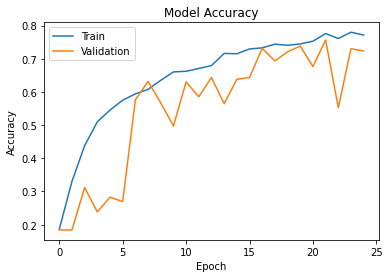

In [239]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [240]:
accuracy = model.evaluate(X_test_normalized, y_test_encoded, verbose=2)

30/30 - 2s - loss: 0.9569 - accuracy: 0.7221 - 2s/epoch - 68ms/step


- We can observe that our accuracy has improved compared to our previous model.

In [241]:
# Here we would get the output as probablities for each category
y_pred=model.predict(X_test_normalized)

30/30 [==============================] - 2s 69ms/step


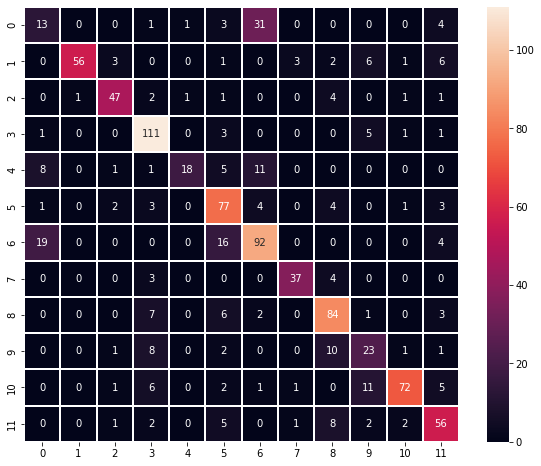

In [242]:
# Obtaining the categorical values from y_test_encoded and y_pred
y_pred_arg=np.argmax(y_pred,axis=1)
y_test_arg=np.argmax(y_test_encoded,axis=1)

# Plotting the Confusion Matrix using confusion matrix() function which is also predefined tensorflow module
confusion_matrix = tf.math.confusion_matrix(y_test_arg,y_pred_arg)
f, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(
    confusion_matrix,
    annot=True,
    linewidths=.4,
    fmt="d",
    square=True,
    ax=ax
)
plt.show()

In [243]:
from sklearn.metrics import classification_report
print(classification_report((y_test_arg), y_pred_arg))

              precision    recall  f1-score   support

           0       0.31      0.25      0.27        53
           1       0.98      0.72      0.83        78
           2       0.84      0.81      0.82        58
           3       0.77      0.91      0.83       122
           4       0.90      0.41      0.56        44
           5       0.64      0.81      0.71        95
           6       0.65      0.70      0.68       131
           7       0.88      0.84      0.86        44
           8       0.72      0.82      0.77       103
           9       0.48      0.50      0.49        46
          10       0.91      0.73      0.81        99
          11       0.67      0.73      0.70        77

    accuracy                           0.72       950
   macro avg       0.73      0.68      0.69       950
weighted avg       0.73      0.72      0.72       950



#### Observations

- The confusion matrix appears to be improving as well, however there is still some confusion with the 0,5,6 classes of plant seedling.
- The 6th class is the most confused class among all.
- We can observe that this model has outperformed our previous model.

### Model4 - VGG16 with Transfer Learning

In [244]:
# Clearing backend
from tensorflow.keras import backend
backend.clear_session()

# Fixing the seed for random number generators
import random
np.random.seed(42)
random.seed(42)
tf.random.set_seed(42)

In [245]:
# All images to be rescaled by 1/255.
train_datagen = ImageDataGenerator(
                              rotation_range=20, 
                              fill_mode='nearest'
                              )
# test_datagen  = ImageDataGenerator(rescale = 1.0/255.)

In [246]:
from tensorflow.keras.models import Model
from keras.applications.vgg16 import VGG16

vgg_model = VGG16(weights='imagenet', include_top = False, input_shape = (64,64,3))
vgg_model.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 64, 64, 3)]       0         
                                                                 
 block1_conv1 (Conv2D)       (None, 64, 64, 64)        1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 64, 64, 64)        36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 32, 32, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 32, 32, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 32, 32, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 16, 16, 128)       0     

In [247]:
# Making all the layers of the VGG model non-trainable. i.e. freezing them
for layer in vgg_model.layers:
    layer.trainable = False

In [248]:
new_model = Sequential()

# Adding the convolutional part of the VGG16 model from above
new_model.add(vgg_model)

# Flattening the output of the VGG16 model because it is from a convolutional layer
new_model.add(Flatten())

# Adding a dense output layer
new_model.add(Dense(32, activation='relu'))
new_model.add(Dropout(0.2))
new_model.add(Dense(16, activation='relu'))
new_model.add(Dense(12, activation='softmax'))
opt=Adam()
# Compile model
new_model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

# Generating the summary of the model
new_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 2, 2, 512)         14714688  
                                                                 
 flatten (Flatten)           (None, 2048)              0         
                                                                 
 dense (Dense)               (None, 32)                65568     
                                                                 
 dropout (Dropout)           (None, 32)                0         
                                                                 
 dense_1 (Dense)             (None, 16)                528       
                                                                 
 dense_2 (Dense)             (None, 12)                204       
                                                                 
Total params: 14,780,988
Trainable params: 66,300
Non-tr

In [249]:
# Epochs
epochs = 25
# Batch size
batch_size = 64

es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=5)
mc = ModelCheckpoint('best_model.h5', monitor='val_accuracy', mode='max', verbose=1, save_best_only=True)

history_vgg16 = new_model.fit(train_datagen.flow(X_train_normalized,y_train_encoded,
                                       batch_size=batch_size, 
                                       seed=42,
                                       shuffle=False),
                    epochs=epochs,
                    class_weight=class_weights,
                    callbacks=[es, mc],
                    steps_per_epoch=X_train_normalized.shape[0] // batch_size,
                    validation_data=(X_val_normalized,y_val_encoded),
                    verbose=1)

Epoch 1/25
47/47 [==============================] - ETA: 0s - loss: 2.3686 - accuracy: 0.1620
Epoch 1: val_accuracy improved from -inf to 0.21184, saving model to best_model.h5
47/47 [==============================] - 249s 5s/step - loss: 2.3686 - accuracy: 0.1620 - val_loss: 2.2040 - val_accuracy: 0.2118
Epoch 2/25
47/47 [==============================] - ETA: 0s - loss: 2.1586 - accuracy: 0.2060
Epoch 2: val_accuracy improved from 0.21184 to 0.25395, saving model to best_model.h5
47/47 [==============================] - 211s 4s/step - loss: 2.1586 - accuracy: 0.2060 - val_loss: 2.0585 - val_accuracy: 0.2539
Epoch 3/25
47/47 [==============================] - ETA: 0s - loss: 2.0238 - accuracy: 0.2728
Epoch 3: val_accuracy improved from 0.25395 to 0.30132, saving model to best_model.h5
47/47 [==============================] - 209s 4s/step - loss: 2.0238 - accuracy: 0.2728 - val_loss: 1.9713 - val_accuracy: 0.3013
Epoch 4/25
47/47 [==============================] - ETA: 0s - loss: 1.912

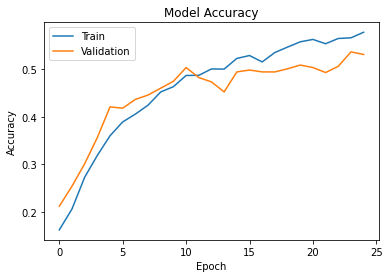

In [250]:
plt.plot(history_vgg16.history['accuracy'])
plt.plot(history_vgg16.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [251]:
accuracy = new_model.evaluate(X_test_normalized, y_test_encoded, verbose=2)

30/30 - 69s - loss: 1.3376 - accuracy: 0.5295 - 69s/epoch - 2s/step


In [252]:
# Here we would get the output as probablities for each category
y_pred=new_model.predict(X_test_normalized)

30/30 [==============================] - 65s 2s/step


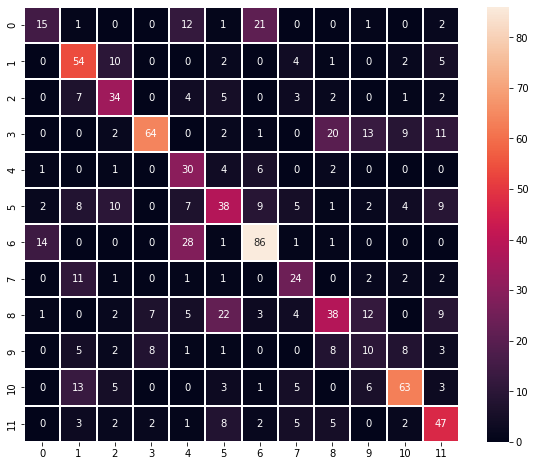

In [253]:
# Obtaining the categorical values from y_test_encoded and y_pred
y_pred_arg=np.argmax(y_pred,axis=1)
y_test_arg=np.argmax(y_test_encoded,axis=1)

# Plotting the Confusion Matrix using confusion matrix() function which is also predefined tensorflow module
confusion_matrix = tf.math.confusion_matrix(y_test_arg,y_pred_arg)
f, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(
    confusion_matrix,
    annot=True,
    linewidths=.4,
    fmt="d",
    square=True,
    ax=ax
)
plt.show()

In [254]:
from sklearn.metrics import classification_report
print(classification_report((y_test_arg), y_pred_arg))

              precision    recall  f1-score   support

           0       0.45      0.28      0.35        53
           1       0.53      0.69      0.60        78
           2       0.49      0.59      0.54        58
           3       0.79      0.52      0.63       122
           4       0.34      0.68      0.45        44
           5       0.43      0.40      0.42        95
           6       0.67      0.66      0.66       131
           7       0.47      0.55      0.51        44
           8       0.49      0.37      0.42       103
           9       0.22      0.22      0.22        46
          10       0.69      0.64      0.66        99
          11       0.51      0.61      0.55        77

    accuracy                           0.53       950
   macro avg       0.51      0.52      0.50       950
weighted avg       0.55      0.53      0.53       950



- According to the confusion matrix and accuracy curve, the VGG16 model has outperformed Model1 and Model2 i.e. ordinary CNN models.
- However Model3 which uses Data Augmentation + Batch Normalization is our best model and we can use this model to predict and visualize some test images.

### Visualizing the Prediction

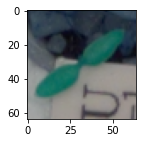

1/1 [==============================] - 0s 76ms/step
Predicted Label ['Common Chickweed']
True Label Common Chickweed


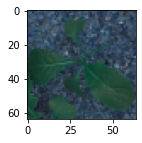

1/1 [==============================] - 0s 29ms/step
Predicted Label ['Charlock']
True Label Charlock


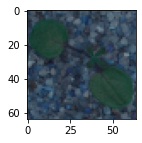

1/1 [==============================] - 0s 22ms/step
Predicted Label ['Cleavers']
True Label Cleavers


In [258]:
# Visualizing the predicted and correct label of images from test data
plt.figure(figsize=(2,2))
plt.imshow(X_test[2])
plt.show()
print('Predicted Label', enc.inverse_transform(model.predict((X_test_normalized[2].reshape(1,64,64,3)))))   # reshaping the input image as we are only trying to predict using a single image
print('True Label', enc.inverse_transform(y_test_encoded)[2])                                               # using inverse_transform() to get the output label from the output vector

plt.figure(figsize=(2,2))
plt.imshow(X_test[33])
plt.show()
print('Predicted Label', enc.inverse_transform(model.predict((X_test_normalized[33].reshape(1,64,64,3)))))  # reshaping the input image as we are only trying to predict using a single image
print('True Label', enc.inverse_transform(y_test_encoded)[33])                                              # using inverse_transform() to get the output label from the output vector

plt.figure(figsize=(2,2))
plt.imshow(X_test[36])
plt.show()
print('Predicted Label', enc.inverse_transform(model.predict((X_test_normalized[36].reshape(1,64,64,3)))))  # reshaping the input image as we are only trying to predict using a single image
print('True Label', enc.inverse_transform(y_test_encoded)[36])  

### Model Comparison

In [257]:
pd.DataFrame({'Models':['Base CNN Model','With extra conv layer + different filter size','With Data Augmentation + Batch Normalization','VGG16 Transfer Learning Model'],'Train Accuracy':['42%','48%','77%','58%'],'Validation Accuracy':['51%','52%','76%','54%'],'Test Accuracy':['52%','54%','72%','53%']})

Models Train Accuracy  \
0                                 Base CNN Model            42%   
1  With extra conv layer + different filter size            48%   
2   With Data Augmentation + Batch Normalization            77%   
3                  VGG16 Transfer Learning Model            58%   

  Validation Accuracy Test Accuracy  
0                 51%           52%  
1                 52%           54%  
2                 76%           72%  
3                 54%           53%

### Conclusions

- We can observe from the confusion matrix of all the models that our Model3 Data Augmentation + Batch Normalization model was the best model because it predicted the majority of the classes better than the other models.
- The test accuracy of the Data Augmentation + Batch Normalization model is 72%.
- The transfer learning has helped in improving the model performance.
- Simply employing the transfer learning model can produce a better outcome than any ordinary CNN.

### Scope of Improvement

- These models can be further improved by training with different filter sizes and different number of filters.
- Some models can also be trained on the original image_size i.e 128 x 128 rather than being reduced to 64.
- Data Augmentation can be performed more and dropout_rate can be changed to improve the model performance.
- Other Transfer Learning architectures can also be used to train the CNN model and these models can be used for classification.